In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

#You can only unzip a zipped tuple once before it is removed from the computer's memory. 

#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [6]:
len(cities)

640

In [7]:
import requests
requests.__version__

'2.27.1'

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# UTILIZA 2 LOOPS PARA HACER LOS URL MEJOR SE VA A UTILIZAR EL DE ABAJO CON EL METODO ENUMERATE

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | carutapera
Processing Record 3 of Set 1 | korop
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | waterloo
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | praia da vitoria
Processing Record 8 of Set 1 | tezu
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | quatre cocos
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | grootfontein
Processing Record 13 of Set 1 | hendijan
City not found. Skipping...
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | sorong
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | grand gaube
Processing Record 21 of Set 1 | punta arenas
Processing R

Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | manoel urbano
Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | dongsheng
Processing Record 42 of Set 4 | bhag
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | lichinga
Processing Record 45 of Set 4 | ocean city
Processing Record 46 of Set 4 | dipkarpaz
City not found. Skipping...
Processing Record 47 of Set 4 | laranjeiras do sul
Processing Record 48 of Set 4 | czersk
Processing Record 49 of Set 4 | filadelfia
Processing Record 50 of Set 4 | chapais
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | mildura
Processing Record 3 of Set 5 | rodos
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | selenginsk
Processing Record 6 of Set 5 | rosetta
Processing Record 7 of Set 5 | dwarka
Processing Record 8 of Set 5 | barinas
Processing Record 9 of Set 5 | yulara
Processing Record 10 of Set 5 | faanui
Processing Record 11 of Set 5 | o

City not found. Skipping...
Processing Record 26 of Set 8 | huadian
Processing Record 27 of Set 8 | opuwo
Processing Record 28 of Set 8 | huilong
Processing Record 29 of Set 8 | talara
Processing Record 30 of Set 8 | maniitsoq
Processing Record 31 of Set 8 | spirit river
Processing Record 32 of Set 8 | fecamp
Processing Record 33 of Set 8 | sarakhs
Processing Record 34 of Set 8 | panjab
Processing Record 35 of Set 8 | zelenoborskiy
Processing Record 36 of Set 8 | auchel
Processing Record 37 of Set 8 | kununurra
Processing Record 38 of Set 8 | outjo
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | urusha
Processing Record 41 of Set 8 | khawhai
Processing Record 42 of Set 8 | tahe
Processing Record 43 of Set 8 | kontagora
Processing Record 44 of Set 8 | kwinana
Processing Record 45 of Set 8 | turochak
Processing Record 46 of Set 8 | namibe
Processing Record 47 of Set 8 | sorland
Processing Record 48 of Set 8 | kyra
Processing Record 49 of Set 8 | vizinga
Processing

Processing Record 17 of Set 12 | kaseda
Processing Record 18 of Set 12 | bilma
Processing Record 19 of Set 12 | wad rawah
Processing Record 20 of Set 12 | simao
Processing Record 21 of Set 12 | kuzhithurai
Processing Record 22 of Set 12 | san carlos de bariloche
Processing Record 23 of Set 12 | ugoofaaru
Processing Record 24 of Set 12 | wamba
Processing Record 25 of Set 12 | barreiras
Processing Record 26 of Set 12 | raudeberg
Processing Record 27 of Set 12 | udachnyy
Processing Record 28 of Set 12 | evanston
Processing Record 29 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 12 | yeppoon
Processing Record 31 of Set 12 | tapiramuta
Processing Record 32 of Set 12 | te anau
Processing Record 33 of Set 12 | wattegama
Processing Record 34 of Set 12 | conde
Processing Record 35 of Set 12 | namatanai
Processing Record 36 of Set 12 | altus
Processing Record 37 of Set 12 | geraldton
Processing Record 38 of Set 12 | beringovskiy
Processing Record 39 of Set 12 

In [23]:
len(city_data)

585

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,51.62,41,70,3.00,US,2022-02-11 19:07:58
1,Carutapera,-1.1950,-46.0200,83.77,68,97,7.52,BR,2022-02-11 19:10:31
2,Korop,51.5664,32.9586,30.16,95,100,4.74,UA,2022-02-11 19:10:31
3,Cabo San Lucas,22.8909,-109.9124,78.51,55,0,6.91,MX,2022-02-11 19:07:47
4,Waterloo,43.4668,-80.5164,36.32,96,100,14.00,CA,2022-02-11 19:07:06
5,Touros,-5.1989,-35.4608,86.90,66,42,13.51,BR,2022-02-11 19:10:32
6,Praia Da Vitoria,38.7333,-27.0667,60.76,76,74,4.90,PT,2022-02-11 19:10:32
7,Tezu,27.9167,96.1667,54.07,68,95,3.04,IN,2022-02-11 19:10:33
8,Mataura,-46.1927,168.8643,53.47,92,95,3.89,NZ,2022-02-11 19:10:33
9,Quatre Cocos,-20.2078,57.7625,76.08,80,35,3.56,MU,2022-02-11 19:10:34


In [28]:
city_data_df.keys()

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [45]:
city_data_df = city_data_df[new_column_order]

In [46]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-02-11 19:07:58,42.6001,-73.9662,51.62,41,70,3.00
1,Carutapera,BR,2022-02-11 19:10:31,-1.1950,-46.0200,83.77,68,97,7.52
2,Korop,UA,2022-02-11 19:10:31,51.5664,32.9586,30.16,95,100,4.74
3,Cabo San Lucas,MX,2022-02-11 19:07:47,22.8909,-109.9124,78.51,55,0,6.91
4,Waterloo,CA,2022-02-11 19:07:06,43.4668,-80.5164,36.32,96,100,14.00
5,Touros,BR,2022-02-11 19:10:32,-5.1989,-35.4608,86.90,66,42,13.51
6,Praia Da Vitoria,PT,2022-02-11 19:10:32,38.7333,-27.0667,60.76,76,74,4.90
7,Tezu,IN,2022-02-11 19:10:33,27.9167,96.1667,54.07,68,95,3.04
8,Mataura,NZ,2022-02-11 19:10:33,-46.1927,168.8643,53.47,92,95,3.89
9,Quatre Cocos,MU,2022-02-11 19:10:34,-20.2078,57.7625,76.08,80,35,3.56


In [47]:
len(city_data_df)

585

In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

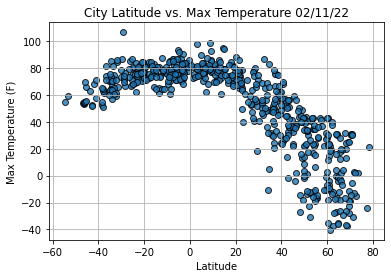

In [50]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

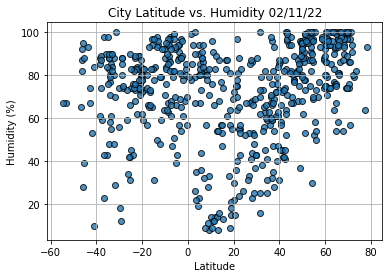

In [51]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

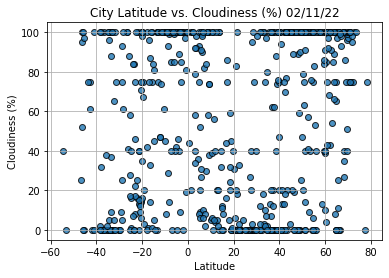

In [52]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

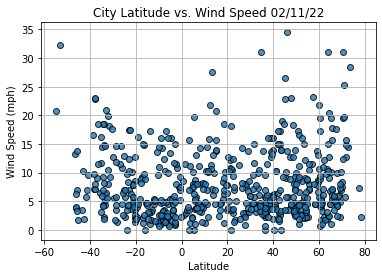

In [53]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()